In [15]:
!wget https://course.ccs.neu.edu/cs6220/homework-4/data/f150_motor_distributors.txt

--2023-03-01 10:43:50--  https://course.ccs.neu.edu/cs6220/homework-4/data/f150_motor_distributors.txt
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255541 (250K) [text/plain]
Saving to: ‘f150_motor_distributors.txt’

f150_motor_distribu 100%[===================>] 249.55K  --.-KB/s    in 0.1s    

2023-03-01 10:43:50 (1.87 MB/s) - ‘f150_motor_distributors.txt’ saved [255541/255541]



# **Question 1**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


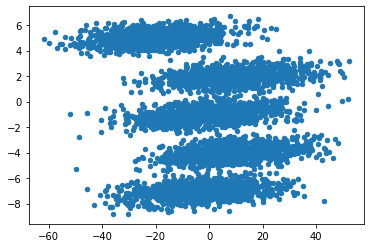

In [16]:
X = np.loadtxt("f150_motor_distributors.txt",delimiter=",")
plt.scatter(X[:, 0], X[:, 1], s=20)
plt.show()

## **Question 1 - a**
### Implement a simple k-means algorithm in Python

In [17]:
def findClosestCentroids(X, centroids):
    idx = np.zeros(len(X))
    for i in range(len(X)):
        minDistance=float('inf')
        index=0

        for k in range(len(centroids)):
            # Euclidean distance
            distance=np.sum(np.power(X[i]-centroids[k],2))
            if(distance<minDistance):
                minDistance=distance
                index=k
                # Minimum distance from the k-th center point
        idx[i]=index
    return idx

# Recalculate center point position
def computeCentroids(X, idx):
    # Find all cluster center indexes
    k = set(np.ravel(idx).tolist()) 
    k = list(k)
    centroids = np.ndarray((len(k),X.shape[1]))
    
    for i in range(len(k)):
    # Select the data with category k [i] in data X and select by row
        data = X[np.where(idx==k[i])[0]]
        #Recalculate the cluster center, axis=0 is row compression, 
        #add each column of the matrix to form a one-dimensional array, 
        #and divide by the number of rows of the original matrix to get the cluster center
        centroids[i] = np.sum(data,axis=0)/len(data) 
    return centroids



In [20]:
def k_means(X, k, max_iters):

  # UsingUsing given initialization
    initial_centroids = np.array([[10, 10], [-10, -10], [2, 2], [3, 3], [-3, -3]])
    
    for i in range(max_iters):
        if(i==0):
            centroids=initial_centroids
        #Calculate the distance from the sample to the cluster center, 
        #and return the cluster center to which each sample belongs
        idx=findClosestCentroids(X,centroids)
        #Recalculate cluster center
        centroids=computeCentroids(X,idx)
    return idx,centroids



In [31]:
# 100 iterations
idx,centroids = k_means(X, 5, 100)
print(idx)
print(centroids)



[4. 1. 4. ... 3. 1. 1.]
[[ 27.26677403  -1.08848482]
 [-32.27032272   2.65984149]
 [ -1.45401192  -2.23932918]
 [ 11.48737759  -1.70898344]
 [-15.05895772  -0.47281415]]


## **Question 1 - b**
###  Scatter the results in two dimensions with different clusters as different colors.

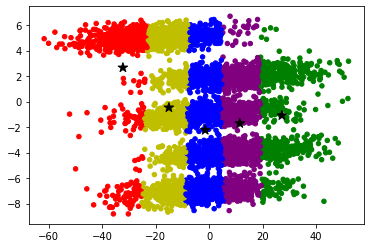

In [22]:
colors = mpl.colors.ListedColormap(['g', 'r', 'b','purple','y'])
c=mpl.colors.ListedColormap('k')
#colors = ['red', 'blue', 'green', 'yellow', 'purple']
plt.scatter(X[:, 0], X[:, 1], c=np.ravel(idx), cmap=colors, s=20)
plt.scatter(centroids[:, 0], centroids[:, 1], c=np.arange(len(centroids)), cmap=c, marker='*', s=100)
plt.show()



## **Question 1 - c**
##### **Why is  a logical choice for this dataset?**
Because based on the scatter plot of our dataset, we can notice that these data points make 5 clusters clearly. That’s why k = 5 is a logical choice for this dataset.
##### **After plotting your resulting clusters, what do you notice? Did it cluster very well?**
No, it did not cluster very well. Because after plotting, I notice that each cluster is sparsely distributed, not dense.
##### **Is there an initialization that would make it cluster well?**
I don’t think there is an initialization that would make it cluster well. Because it will always show a similar result by using this method, which shows each cluster is vertically sparsely distributed, not horizontally densely distributed. 


# **Question 2**

## **Question 2 - a**
####Implement a specialized k-means with the above Mahalanobis Distance. Scatter the results with the different clusters as different colors.
####What do you notice?

### Answer: from the figure above, I notice that the result is much better than Question 1.

In [23]:
P = np.array([[10, 0.5], [-10, 0.25]])
factor = np.linalg.inv(P.T @ P)

def mahalanobis_distance(x, y, factor): 
    return (x - y).T @ factor @ (x - y)

In [24]:
def findClosestCentroids_MD(X, centroids):
    idx = np.zeros(len(X))

    for i in range(len(X)):
        minDistance=float('inf')
        index=0
        for k in range(len(centroids)):
            # mahalanobis distance
            distance = mahalanobis_distance(centroids[k],X[i],factor)
            if(distance<minDistance):
                minDistance=distance
                index=k
        idx[i]=index
    return idx

def computeCentroids(X, idx):
    k = set(np.ravel(idx).tolist())
    k = list(k)
    centroids = np.ndarray((len(k),X.shape[1]))
    
    for i in range(len(k)):
        data = X[np.where(idx==k[i])[0]]
        centroids[i] = np.sum(data,axis=0)/len(data) 
    return centroids

In [25]:
def k_means_MD(X, k):
    internation = 1000
    centroids = np.array([[10, 10], [-10, -10], [2, 2], [3, 3], [-3, -3]])
  
    for i in range(internation):
        idx=findClosestCentroids_MD(X,centroids)
        new_centroids=computeCentroids(X,idx)
        if np.array_equal(new_centroids, centroids):
            break
        centroids = new_centroids
    return idx,centroids

In [26]:
idx1,centroids1 = k_means_MD(X, 5)
print(idx1)
print(centroids1)

[1. 1. 2. ... 2. 0. 2.]
[[-20.40310599   5.00655283]
 [ -3.24764066  -7.01766444]
 [ -1.09670369  -0.9992032 ]
 [  9.97451285   2.00207148]
 [  8.71408722  -4.00981947]]


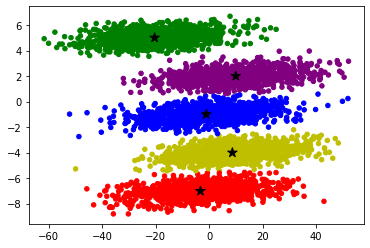

In [27]:
colors = mpl.colors.ListedColormap(['g', 'r', 'b','purple','y'])
star=mpl.colors.ListedColormap('k')
plt.scatter(X[:, 0], X[:, 1], c=np.ravel(idx1), cmap=colors, s=20)
plt.scatter(centroids1[:, 0], centroids1[:, 1], c=np.arange(len(centroids1)), cmap=star, marker='*', s=100)
plt.show()

## **Question 2 - b**
####Calculate and print out the principle components of the aggregate data.

eig_vec:
[[ 0.99838317  0.05684225]
 [-0.05684225  0.99838317]]
eig_val:
[1612213.15649735   86924.89062219]
data:
[[-10.33254906  -7.6356903 ]
 [-25.36097916  -7.41205973]
 [-11.65548133  -1.03953719]
 ...
 [ 14.07157308   1.70302537]
 [-33.3705919    3.51819072]
 [-25.51506544  -2.09006015]]


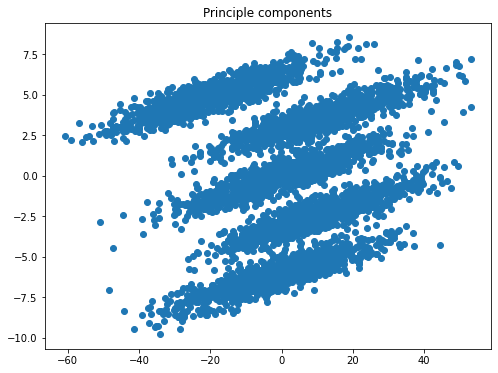

None


In [28]:
def pca(X,k):
  #mean of each feature
  n_samples, n_features = X.shape
  mean=np.array([np.mean(X[:,i]) for i in range(n_features)])

  norm_X=X-mean
  scatter_matrix=np.dot(np.transpose(norm_X),norm_X)

  #Calculate the eigenvectors and eigenvalues
  eig_val, eig_vec = np.linalg.eig(scatter_matrix)

  eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(n_features)]
  eig_pairs.sort(reverse=True)

  feature=np.array([ele[1] for ele in eig_pairs[:k]])
  #get new data
  data = np.dot(norm_X,np.transpose(feature))
  #print(eig_pairs)
  
  print("eig_vec:")
  print(eig_vec)
  print("eig_val:")
  print(eig_val)
  print("data:")
  print(data)

  fig = plt.figure(figsize=(8, 6))
  plt.scatter(data[:, 0], data[:, 1])
  plt.title('Principle components')
  plt.show()
 
X = np.loadtxt("f150_motor_distributors.txt",delimiter=",")
print(pca(X,2))



## **Question 2 - c**
####Calculate and print out the principle components of each cluster. Are they the same as the aggregate data? Are they the same as each other?

### Answer: the principle components of each cluster are not the same as the aggregate data. They are similar to each other.

eig_vec:
[[ 0.99993527 -0.01137789]
 [ 0.01137789  0.99993527]]
eig_val:
[194830.89058105    271.93249514]
data:
[[  7.25405752  -0.25378307]
 [-18.11417956  -0.68829451]
 [ 27.23950349  -0.76561297]
 ...
 [  5.98078814   0.21199726]
 [  8.49049436   0.21735037]
 [-13.9396063   -0.44222502]]


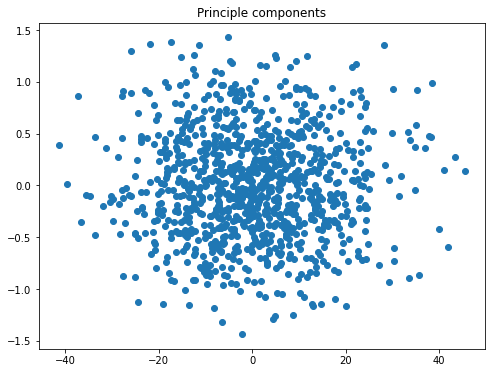

eig_vec:
[[ 0.99992533 -0.01222027]
 [ 0.01222027  0.99992533]]
eig_val:
[204172.43019429    283.10966196]
data:
[[ -8.73419248  -0.91529791]
 [-23.71132555   0.34533961]
 [  1.94266087   0.75298475]
 ...
 [  6.37240317  -0.70787872]
 [-15.07539706   0.44106933]
 [  0.90286284  -0.33686259]]


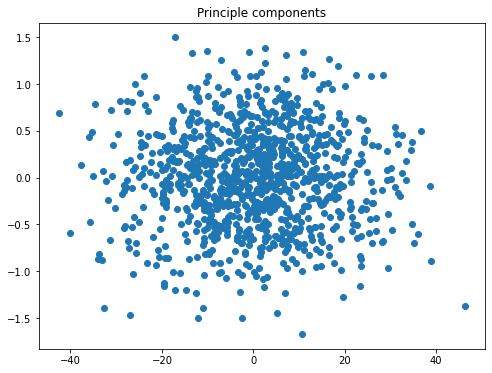

eig_vec:
[[ 0.99990986 -0.01342629]
 [ 0.01342629  0.99990986]]
eig_val:
[218001.47457169    277.53733718]
data:
[[-11.82317836  -0.22101684]
 [ -7.97251269  -0.07352572]
 [-21.79151461   0.27086357]
 ...
 [-15.03445302  -0.59867838]
 [ 14.03297252   0.70765947]
 [-25.72231983  -0.29542422]]


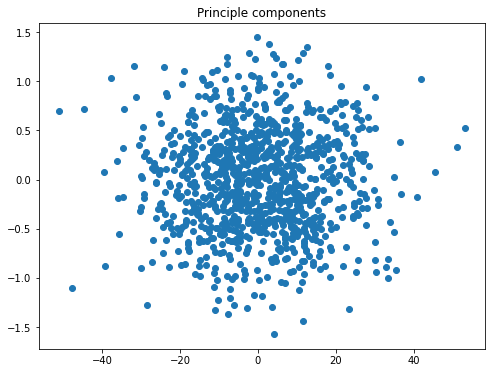

eig_vec:
[[ 0.99993306 -0.01157047]
 [ 0.01157047  0.99993306]]
eig_val:
[203808.38379012    268.96095496]
data:
[[ 12.50154109  -0.080114  ]
 [ 26.88083768   0.15701845]
 [-12.34056372  -0.61900941]
 ...
 [ 28.29556699  -0.14442832]
 [ -8.76609494   0.96638809]
 [ -3.12687729  -0.41684377]]


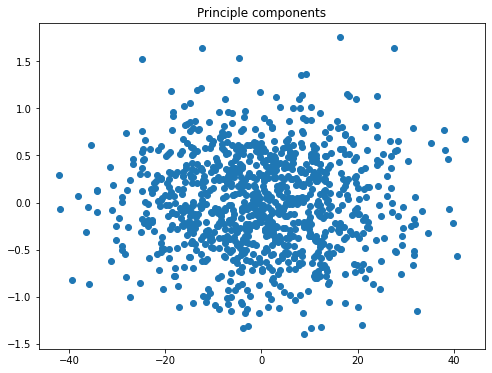

eig_vec:
[[ 0.99989374 -0.01457781]
 [ 0.01457781  0.99989374]]
eig_val:
[190961.02031395    262.76085431]
data:
[[-25.99638961  -0.96756674]
 [-58.71301722  -0.41374627]
 [ -8.42892305  -0.14539332]
 ...
 [  1.42435118  -0.82899984]
 [-24.31180609  -0.48532642]
 [ -0.59071656  -0.68142565]]


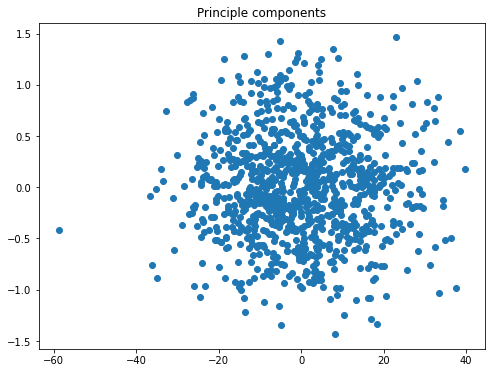

In [29]:
# For each cluster: 
for i in range(5):
  indices = np.where(idx1 == i)
  pca(X[indices],2)

## **Question 2 - d**
####What is the relationship between P′ and the data?

In [4]:
np.linalg.eig( P.T @ P )

(array([200.031294,   0.281206]), array([[ 0.99992166, -0.01251662],
        [ 0.01251662,  0.99992166]]))

In [11]:
vals,vec = np.linalg.eig(P.T)
D = np.diag(vals)
V = vec
#v = np.array([[v[0],0],[0,v[1]]])
P_=V@D

In [30]:
D

array([[9.45693086, 0.        ],
       [0.        , 0.79306914]])

In [12]:
P_

array([[9.44301625, 0.58344264],
       [0.51282107, 0.53717161]])

####From the result above, we can find the relationship: P′=ΛΦ=P.TΦ
####Also, the eigenvectors of np.linalg.eig(P.T @ P) be very similar to each individual cluster PCA components. And my final projection matrix is a square matrix.